<style>
.center 
{
  width: auto;
  display: table;
  margin-left: auto;
  margin-right: auto;
}
</style>

# Project: Bandit Learning

---

## Part 1: Classical Bandit Algorithm

We consider a time-slotted bandit system $(t = 1, 2, \ldots)$ with three arms. We denote the arm set as $\{1, 2, 3\}$. Pulling each arm $j$ $(j \in \{1, 2, 3\})$ will obtain a random reward $r_j$, which follows a Bernoulli distribution with mean $\theta _j$, i.e., $\operatorname{Bern}(\theta _j)$. Specifically,

$$
r_j=\begin{cases}
    1, &\text{w.p. } \theta _j, \\
    0, &\text{w.p. } 1-\theta _j,
\end{cases}
$$

where $\theta _j$, $j\in \{1,2,3\}$ are parameters within $(0,1)$.

Now we run this bandit system for $N$ $(N \gg 3)$ time slots. In each time slot $t$, we choose one and only one arm from these three arms, which we denote as $I(t)\in\{1, 2, 3\}$. Then we pull the arm $I(t)$ and obtain a random reward $r_{I(t)}$. Our objective is to find an optimal policy to choose an arm $I(t)$ in each time slot $t$ such that the expectation of the aggregated reward over $N$ time slots is maximized, i.e.,

$$
\max_{I(t),t=1,\ldots,N} \mathbb{E}\left[\sum_{t=1}^N r_{I(t)}\right]
$$

If we know the values of $\theta _j$, $j\in\{1,2,3\}$, this problem is trivial. Since $r_{I(t)}\sim\operatorname{Bern}(\theta_{I(t)})$,

$$
\mathbb{E}\left[\sum_{t=1}^N r_{I(t)}\right]=\sum_{t=1}^N \mathbb{E}[r_{I(t)}]=\sum_{t=1}^N \theta _{I(t)}
$$

Let $I(t)=I^*=\arg\max_{j\in\{1,2,3\}} \theta _j$ for $t=1,2,\ldots,N$, then

$$
\max_{I(t),t=1,\ldots,N} \mathbb{E}\left[\sum_{t=1}^N r_{I(t)}\right]=N\cdot\theta _{I^*}.
$$

However, in reality, we do not know the values of $\theta _j$, $j\in\{1,2,3\}$. We need to estimate the values $\theta _j$, $j\in\{1,2,3\}$ via empirical samples, and then make the decisions in each time slot. Next we introduce three classical bandit algorithms: $\epsilon$-greedy, UCB, and TS, respectively.

#### (1). $\epsilon$-greedy Algorithm $(0\leq\epsilon\leq 1)$

$\text{------------------------------------------------------------------------------------------}$  
**Algorithm 1** $\epsilon$-greedy Algorithm  
$\text{------------------------------------------------------------------------------------------}$  
**Initialize** $\hat{\theta}_j\gets 0$, $\text{count}(j)\gets 0$, $j\in\{1,2,3\}$  
1: **for** $t=1,2,\ldots,N$ **do**  
2:  
$\quad\quad I(t)\gets\begin{cases}
    \arg\max_{j\in\{1,2,3\}} \hat{\theta}_j &\text{w.p. } 1-\epsilon \\
    \text{randomly chosen from}\{1,2,3\} &\text{w.p. } \epsilon
\end{cases}$  
3: $\quad\text{count}(I(t))\gets\text{count}(I(t))+1$  
4: $\quad\hat{\theta}(I(t))\gets\hat{\theta}(I(t))+\frac{1}{\text{count}(I(t))}\left[r_{I(t)}-\hat{\theta}(I(t))\right]$  
5: **end for**  
$\text{------------------------------------------------------------------------------------------}$

#### (2). UCB (Upper Confidence Bound) Algorithm

$\text{------------------------------------------------------------------------------------------}$  
**Algorithm 2** UCB Algorithm  
$\text{------------------------------------------------------------------------------------------}$  
1: **for** $t=1,2,3$ **do**  
2: $\quad I(t)\gets t$  
3: $\quad\text{count}(I(t))\gets 1$  
4: $\quad\hat{\theta(I(t))}\gets r_{I(t)}$  
5: **end for**  
6: **for** $t=4,\ldots,N$ **do**  
7:  
$\quad\quad I(t)\gets\arg\max_{j\in\{1,2,3\}}\left(\hat{\theta}(j)+c\cdot\sqrt{\frac{2\log(t)}{\text{count}(j)}}\right)$  
8: $\quad\text{count}(I(t))\gets\text{count}(I(t))+1$  
9: $\quad\hat{\theta}(I(t))\gets\hat{\theta}(I(t))+\frac{1}{\text{count}(I(t))}\left[r_{I(t)}-\hat{\theta}(I(t))\right]$  
10: **end for**  
$\text{------------------------------------------------------------------------------------------}$  
**Note:** $c$ is a positive constant with a default value of $1$.

#### (3). TS (Thompson Sampling) Algorithm

Recall that $\theta_j$, $j\in\{1,2,3\}$ are unknown parameters over $(0,1)$. From the Bayesian perspective, we assume their priors are Beta distributions with parameters $(\alpha_j,\beta_j)$.

$\text{------------------------------------------------------------------------------------------}$  
**Algorithm 3** TS Algorithm  
$\text{------------------------------------------------------------------------------------------}$  
**Initialize** Beta parameter $(\alpha_j,\beta_j)$, $j\in\{1,2,3\}$  
1: **for** $t=1,2,\ldots,N$ **do**  
2: $\quad$ $\#\,\, Sample\,\, model$  
3: $\quad$ **for** $j\in\{1,2,3\}$ **do**  
4: $\quad\quad$ Sample $\hat{\theta}(j)\sim\operatorname{Beta}(\alpha_j,\beta_j)$  
5: $\quad$ **end for**  
6: $\quad\#\,\, Select\,\, and\,\, pull\,\, the\,\, arm$  
$\quad\quad I(t)\gets\arg\max_{j\in\{1,2,3\}}\hat{\theta}(j)$  
7: $\quad\#\,\, Update\,\, the\,\, distribution$  
$\quad\quad\alpha_{I(t)}\gets\alpha_{I(t)}+r_{I(t)}$  
$\quad\quad\beta_{I(t)}\gets\beta_{I(t)}+1-r_{I(t)}$  
8: **end for**  
$\text{------------------------------------------------------------------------------------------}$

---

> ### Problem 1
>
> Now suppose we obtain the parameters of the Bernoulli distributions from an oracle, which are shown in the following table. Choose $N = 5000$ and compute the theoretically maximized expectation of aggregate rewards over $N$ time slots. We call it the oracle value. Note that these parameters $\theta_j$, $j\in\{1,2,3\}$ and oracle values are unknown to all bandit algorithms.

<div class="center">

|  Arm $j$   | 1   | 2   | 3   |
| :--------: | --- | --- | --- |
| $\theta_j$ | 0.7 | 0.5 | 0.4 |

</div>

### Answer of Problem 1

Since we have already known the value of $\theta$ of each arm, so we just need to choose the arm with the max value of $\theta$ each time to get maximum profit, which is $\theta_1=0.7$.

Since $r_{I(t)} \sim \text{Bern}(\theta_{I(t)})$, we get $E(r_{I(t)}) = \theta_{I(t)}=\theta_1=0.7$

And the maximum expected value is

$$
\begin{aligned}
    \max_{I(t),t=1,2,\cdots,N} E\left[\sum_{t=1}^Nr_{I(t)}\right]&=&&\max_{I(t),t=1,2,\cdots,N} \sum_{t=1}^NE\left[r_{I(t)}\right] \\
    &=&&N\cdot\theta_{I(t)} \\
    &=&& 5000\times 0.7 = 3500
\end{aligned}
$$

So the theoretically maximized expectation of aggregate rewards over time slots is 3500.

---

> ### Problem 2
>
> Implement classical bandit algorithms with following settings:  
> $\text{-}$ $N=5000$  
> $\text{-}$ $\epsilon$-greedy with $\epsilon\in\{0.1,0.5,0.9\}$.  
> $\text{-}$ UCB with $c\in\{1,5,10\}$.  
> $\text{-}$ TS with $\{(\alpha_1,\beta_1)=(1,1),(\alpha_2,\beta_2)=(1,1),(\alpha_3,\beta_3)=(1,1)\}$ and $\{(\alpha_1,\beta_1)=(601,401),(\alpha_2,\beta_2)=(401,601),(\alpha_3,\beta_3)=(2,3)\}$

### Answer of Problem 2

Settings:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# the oracle value
theta_oracle = np.array([0.7, 0.5, 0.4])

# the settings
num_arm = 3  # number of arms
n = 5000  # number of trials in each simulation
epsilon = np.array([0.1, 0.5, 0.9])
c = np.array([1, 5, 10])
alpha = np.array([[1, 1, 1], [601, 401, 2]])
beta = np.array([[1, 1, 1], [401, 601, 3]])

Implementation of the three classical bandit algorithms:


In [2]:
# the epsilon-greedy algorithm returning the total reward after n trials
def epsilon_greedy(num_arm, n, epsilon):
    # initialize the variables
    count = np.zeros(num_arm)
    theta_hat = np.zeros(num_arm)
    reward = 0

    for _ in range(n):
        if np.random.random() < epsilon:  # the exploration
            arm = np.random.randint(num_arm)
        else:  # the exploitation
            arm = np.argmax(theta_hat)
        # update the variables
        count[arm] += 1
        r = np.random.binomial(1, theta_oracle[arm])  # the reward in this trial
        theta_hat[arm] += (1 / count[arm]) * (r - theta_hat[arm])
        reward += r

    return reward, theta_hat

In [3]:
# the UCB (Upper Confidence Bound) algorithm returning the total reward after n trials
def UCB(num_arm, n, c):
    # initialize the variables
    count = np.zeros(num_arm)
    theta_hat = np.zeros(num_arm)
    reward = 0

    # the exploration
    for t in range(num_arm):
        arm = t
        count[arm] += 1
        r = np.random.binomial(1, theta_oracle[arm])  # the reward in this trial
        # update the variables
        theta_hat[arm] = r
        reward += r

    # the exploitation
    for t in range(num_arm + 1, n + 1):
        arm = np.argmax(theta_hat + c * np.sqrt(2 * np.log(t) / count))
        # update the variables
        count[arm] += 1
        r = np.random.binomial(1, theta_oracle[arm])  # the reward in this trial
        theta_hat[arm] += (1 / count[arm]) * (r - theta_hat[arm])
        reward += r

    return reward, theta_hat

In [4]:
# the TS (Thompson sampling) algorithm returning the total reward after n trials
def TS(num_arm, n, alpha, beta):
    # copy the alpha and beta
    alpha_post = np.zeros(num_arm)
    beta_post = np.zeros(num_arm)
    for arm in range(num_arm):
        alpha_post[arm] = alpha[arm]
        beta_post[arm] = beta[arm]

    # initialize the variables
    theta_hat = np.zeros(num_arm)
    reward = 0

    for _ in range(n):
        for arm in range(num_arm):
            theta_hat[arm] = np.random.beta(alpha_post[arm], beta_post[arm])
        arm = np.argmax(theta_hat)
        # update the variables
        r = np.random.binomial(1, theta_oracle[arm])  # the reward in this trial
        alpha_post[arm] += r
        beta_post[arm] += 1 - r
        reward += r

    return reward, alpha_post, beta_post

Implementation of $\epsilon$-greedy algorithm with the given $\epsilon$:


epsilon =  0.1 , reward =  3404 , theta_hat =  [0.698 0.511 0.429]
epsilon =  0.5 , reward =  3072 , theta_hat =  [0.693 0.503 0.396]
epsilon =  0.9 , reward =  2767 , theta_hat =  [0.706 0.5   0.4  ]


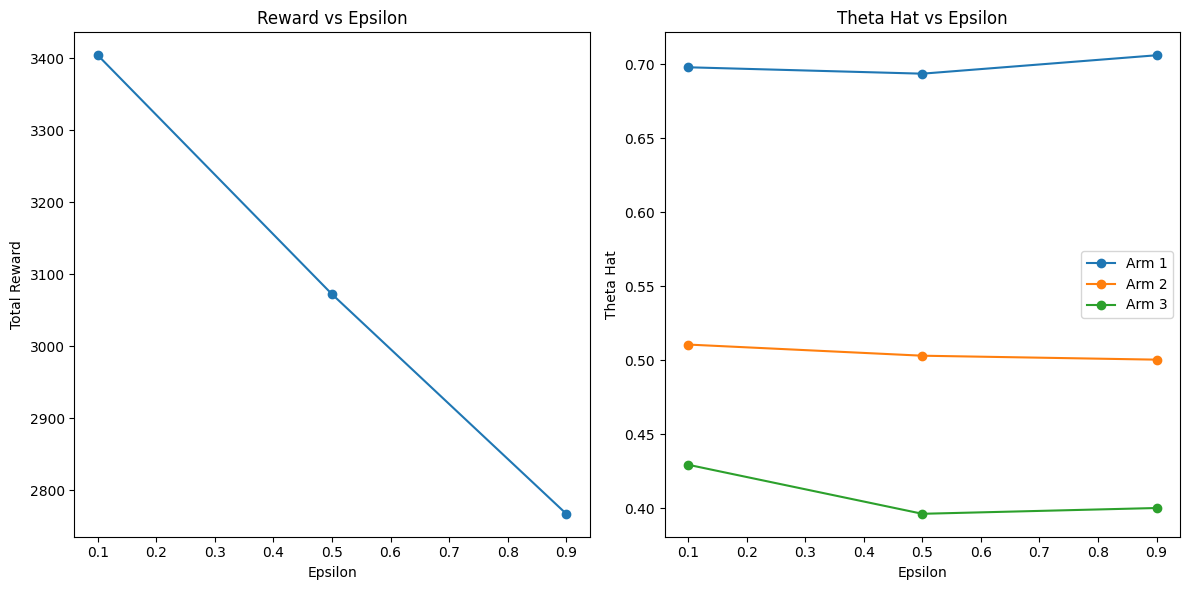

In [5]:
rewards_eg = np.zeros(len(epsilon))
theta_hats = np.zeros((len(epsilon), num_arm))

# Iterate with a progress bar
for i in range(len(epsilon)):
    rewards_eg[i], theta_hats[i] = epsilon_greedy(num_arm, n, epsilon[i])
    print(
        "epsilon = ",
        epsilon[i],
        ", reward = ",
        int(rewards_eg[i]),
        ", theta_hat = ",
        np.around(theta_hats[i], 3),
    )

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for rewards
ax[0].plot(epsilon, rewards_eg, marker='o')
ax[0].set_title('Reward vs Epsilon')
ax[0].set_xlabel('Epsilon')
ax[0].set_ylabel('Total Reward')

# Plot for theta_hats
for arm in range(num_arm):
    ax[1].plot(epsilon, theta_hats[:, arm], marker='o', label=f'Arm {arm + 1}')
ax[1].set_title('Theta Hat vs Epsilon')
ax[1].set_xlabel('Epsilon')
ax[1].set_ylabel('Theta Hat')
ax[1].legend()

plt.tight_layout()
plt.show()

Implementation of UCB algorithm with the given $c$:


c =  1 , reward =  3413 , theta_hat =  [0.701 0.5   0.397]
c =  5 , reward =  2907 , theta_hat =  [0.683 0.49  0.398]
c =  10 , reward =  2828 , theta_hat =  [0.706 0.49  0.394]


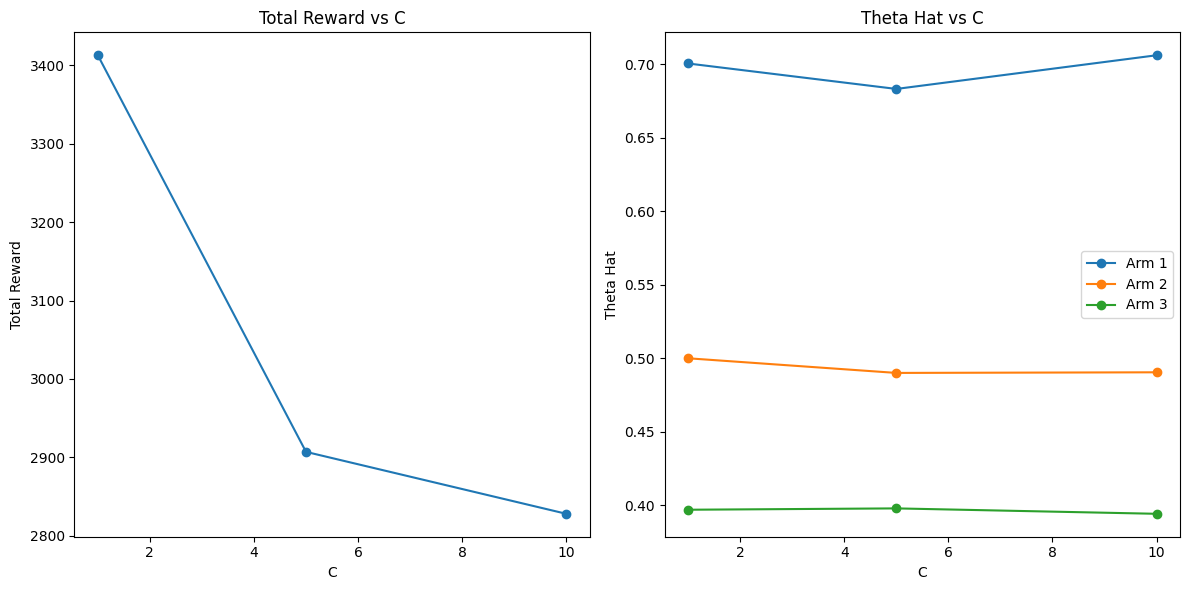

In [6]:
rewards_UCB = np.zeros(len(c))
theta_hats_UCB = np.zeros((len(c), num_arm))
for i in range(len(c)):
    rewards_UCB[i], theta_hats_UCB[i] = UCB(num_arm, n, c[i])
    print(
        "c = ",
        c[i],
        ", reward = ",
        int(rewards_UCB[i]),
        ", theta_hat = ",
        np.around(theta_hats_UCB[i], 3),
    )

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(c, rewards_UCB, marker='o')
ax[0].set_title('Total Reward vs C')
ax[0].set_xlabel('C')
ax[0].set_ylabel('Total Reward')

for arm in range(num_arm):
    ax[1].plot(c, theta_hats_UCB[:, arm], marker='o', label=f'Arm {arm + 1}')
ax[1].set_title('Theta Hat vs C')
ax[1].set_xlabel('C')
ax[1].set_ylabel('Theta Hat')
ax[1].legend()

plt.tight_layout()
plt.show()

Implementation of TS algorithm with the given $\alpha$ and $\beta$:


In [7]:
rewards_TS = np.zeros(len(alpha))
alpha_posts = np.zeros((len(alpha), num_arm))
beta_posts = np.zeros((len(beta), num_arm))
for i in range(len(alpha)):
    rewards_TS[i], alpha_posts[i], beta_posts[i] = TS(num_arm, n, alpha[i], beta[i])
    print("alpha = ", alpha[i], ", beta = ", beta[i])
    print(
        "alpha_post = ",
        alpha_posts[i].astype(int),
        ", beta_post = ",
        beta_posts[i].astype(int),
    )
    print(
        "reward = ",
        int(rewards_TS[i]),
        ", theta_hat = ",
        np.around(alpha_posts[i] / (alpha_posts[i] + beta_posts[i]), 3),
    )
    print()

alpha =  [1 1 1] , beta =  [1 1 1]
alpha_post =  [3503   25    5] , beta_post =  [1438   23   12]
reward =  3530 , theta_hat =  [0.709 0.521 0.294]

alpha =  [601 401   2] , beta =  [401 601   3]
alpha_post =  [4065  401   11] , beta_post =  [1914  601   17]
reward =  3473 , theta_hat =  [0.68  0.4   0.393]



---

> ### Problem 3
>
> Each experiment lasts for $N = 5000$ time slots, and we run each experiment $200$ trials. Results are averaged over these $200$ independent trials.

### Answer of Problem 3

Settings:


In [8]:
num_repeat = 200  # number of reputations

Implementation of $\epsilon$-greedy algorithm with repeat:


epsilon =  0.1 , reward =  3409.375 , theta_hat =  [0.699 0.503 0.4  ]
epsilon =  0.5 , reward =  3082.370 , theta_hat =  [0.701 0.5   0.4  ]
epsilon =  0.9 , reward =  2749.955 , theta_hat =  [0.7   0.499 0.401]


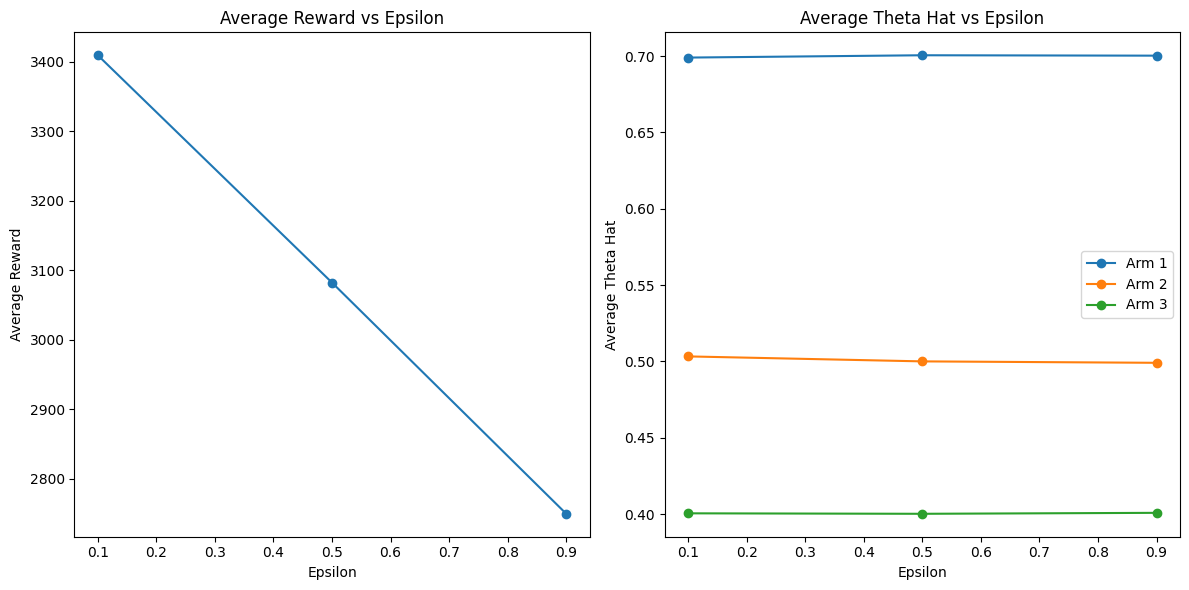

In [9]:
rewards_average_eg = np.zeros(len(epsilon))
theta_hats_average_eg = np.zeros((len(epsilon), num_arm))
rewards_eg = np.zeros(len(epsilon))
theta_hats = np.zeros((len(epsilon), num_arm))
for i in range(len(epsilon)):
    for j in range(num_repeat):
        reward, theta_hat = epsilon_greedy(num_arm, n, epsilon[i])
        rewards_average_eg[i] = (j * rewards_average_eg[i] + reward) / (j + 1)
        theta_hats_average_eg[i] = (j * theta_hats_average_eg[i] + theta_hat) / (j + 1)
    print(
        "epsilon = ",
        epsilon[i],
        ", reward = ",
        format(rewards_average_eg[i], ".3f"),
        ", theta_hat = ",
        np.around(theta_hats_average_eg[i], 3),
    )

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(epsilon, rewards_average_eg, marker='o')
ax[0].set_title('Average Reward vs Epsilon')
ax[0].set_xlabel('Epsilon')
ax[0].set_ylabel('Average Reward')

for arm in range(num_arm):
    ax[1].plot(epsilon, theta_hats_average_eg[:, arm], marker='o', label=f'Arm {arm + 1}')
ax[1].set_title('Average Theta Hat vs Epsilon')
ax[1].set_xlabel('Epsilon')
ax[1].set_ylabel('Average Theta Hat')
ax[1].legend()

plt.tight_layout()
plt.show()

Implementation of UCB algorithm with repeat:


c =  1 , reward =  3412.035 , theta_hat =  [0.7   0.489 0.391]
c =  5 , reward =  2979.505 , theta_hat =  [0.699 0.499 0.402]
c =  10 , reward =  2825.225 , theta_hat =  [0.7   0.499 0.4  ]


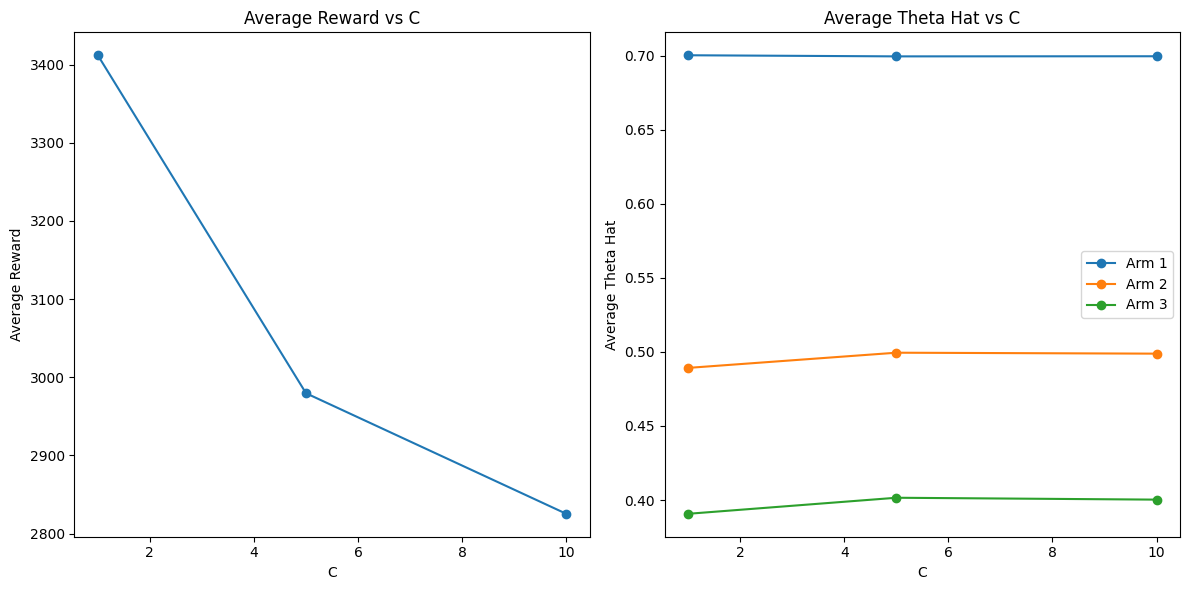

In [10]:
rewards_average_UCB = np.zeros(len(c))
theta_hats_average_UCB = np.zeros((len(c), num_arm))
for i in range(len(c)):
    for j in range(num_repeat):
        reward, theta_hat = UCB(num_arm, n, c[i])
        rewards_average_UCB[i] = (j * rewards_average_UCB[i] + reward) / (j + 1)
        theta_hats_average_UCB[i] = (j * theta_hats_average_UCB[i] + theta_hat) / (j + 1)
    print(
        "c = ",
        c[i],
        ", reward = ",
        format(rewards_average_UCB[i], ".3f"),
        ", theta_hat = ",
        np.around(theta_hats_average_UCB[i], 3),
    )

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(c, rewards_average_UCB, marker='o')
ax[0].set_title('Average Reward vs C')
ax[0].set_xlabel('C')
ax[0].set_ylabel('Average Reward')

for arm in range(num_arm):
    ax[1].plot(c, theta_hats_average_UCB[:, arm], marker='o', label=f'Arm {arm + 1}')
ax[1].set_title('Average Theta Hat vs C')
ax[1].set_xlabel('C')
ax[1].set_ylabel('Average Theta Hat')
ax[1].legend()

plt.tight_layout()
plt.show()

Implementation of TS algorithm with repeat:


In [11]:
rewards_average_TS = np.zeros(len(alpha))
alpha_posts_average_TS = np.zeros((len(alpha), num_arm))
beta_posts_average_TS = np.zeros((len(beta), num_arm))
for i in range(len(alpha)):
    for j in range(num_repeat):
        reward, alpha_post, beta_post = TS(num_arm, n, alpha[i], beta[i])
        rewards_average_TS[i] = (j * rewards_average_TS[i] + reward) / (j + 1)
        alpha_posts_average_TS[i] = (j * alpha_posts_average_TS[i] + alpha_post) / (
            j + 1
        )
        beta_posts_average_TS[i] = (j * beta_posts_average_TS[i] + beta_post) / (j + 1)
    print("alpha = ", alpha[i], ", beta = ", beta[i])
    print(
        "alpha_post = ",
        alpha_posts_average_TS[i].astype(int),
        ", beta_post = ",
        beta_posts_average_TS[i].astype(int),
    )
    print(
        "reward = ",
        format(rewards_average_TS[i], ".3f"),
        ", theta_hat = ",
        np.around(alpha_posts[i] / (alpha_posts[i] + beta_posts[i]), 3),
    )
    print()

alpha =  [1 1 1] , beta =  [1 1 1]
alpha_post =  [3448   24   11] , beta_post =  [1479   25   16]
reward =  3481.295 , theta_hat =  [0.709 0.521 0.294]

alpha =  [601 401   2] , beta =  [401 601   3]
alpha_post =  [4079  401   13] , beta_post =  [1893  601   20]
reward =  3490.060 , theta_hat =  [0.68  0.4   0.393]



---

#### A more intuitive display of the influence the variation of the parameters have on the reward regarding the epsilon greedy and UCB algorithm

#### $\epsilon$-greedy algorithm 

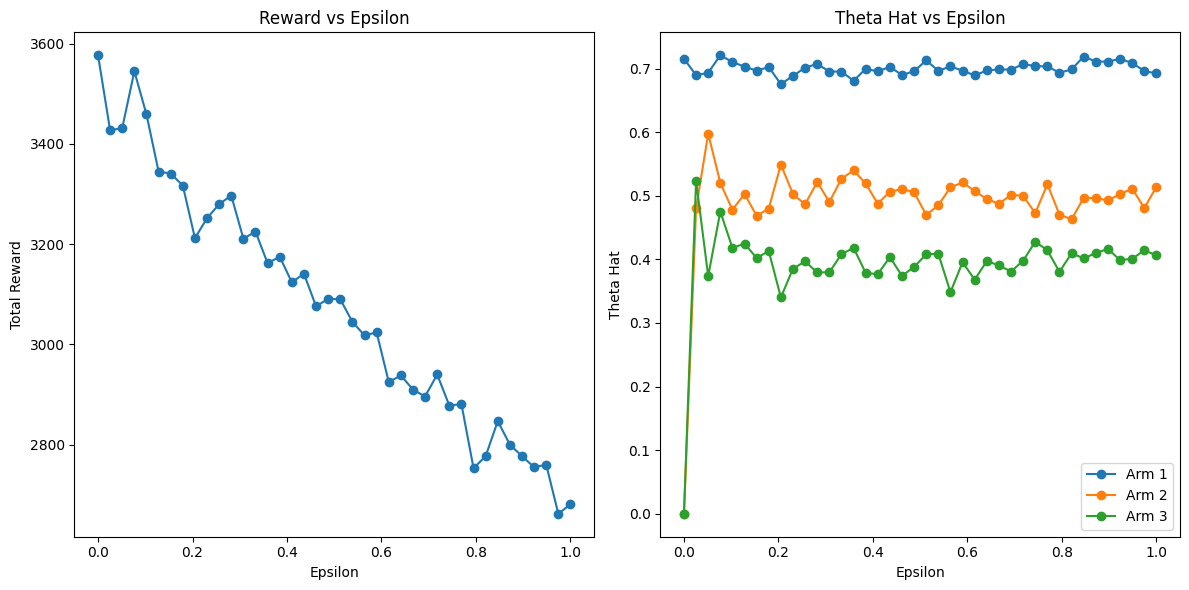

In [12]:

epsilon_range = np.linspace(0, 1, 40)
# Arrays to store the results
rewards_eg = np.zeros(len(epsilon_range))
theta_hats = np.zeros((len(epsilon_range), num_arm))

# Iterate over the range of epsilon values
for i, eps in enumerate(epsilon_range):
    rewards_eg[i], theta_hats[i] = epsilon_greedy(num_arm, n, eps)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for rewards
ax[0].plot(epsilon_range, rewards_eg, marker='o')
ax[0].set_title('Reward vs Epsilon')
ax[0].set_xlabel('Epsilon')
ax[0].set_ylabel('Total Reward')

# Plot for theta_hats
for arm in range(num_arm):
    ax[1].plot(epsilon_range, theta_hats[:, arm], marker='o', label=f'Arm {arm + 1}')
ax[1].set_title('Theta Hat vs Epsilon')
ax[1].set_xlabel('Epsilon')
ax[1].set_ylabel('Theta Hat')
ax[1].legend()

plt.tight_layout()
plt.show()

#### UCB algorithm 

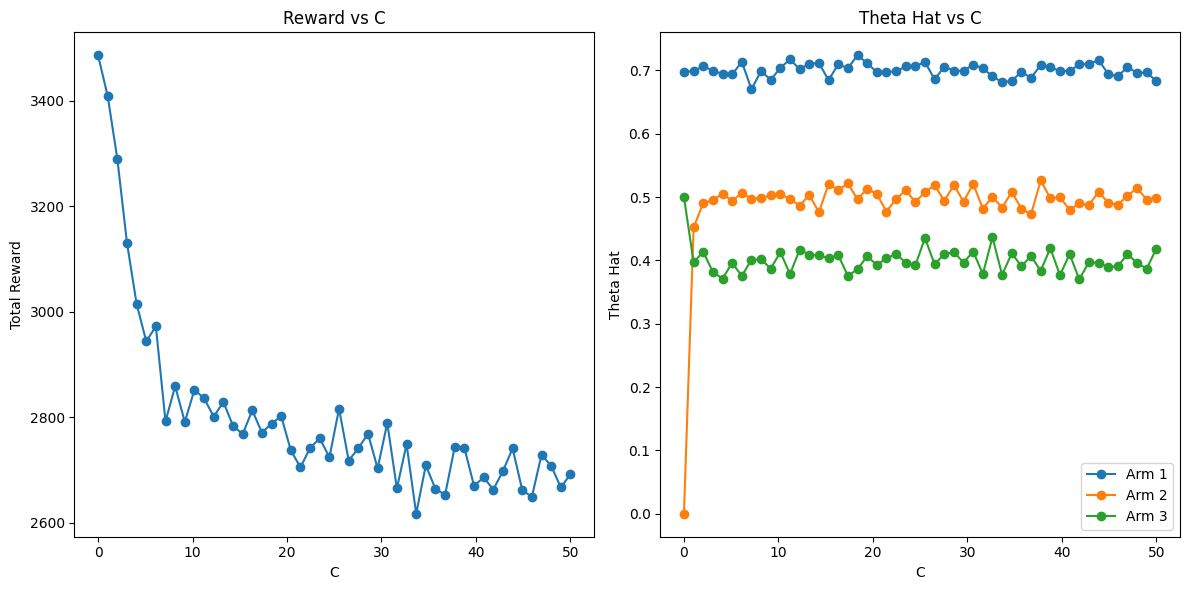

In [13]:
# Running the simulations for different c values
c_values = np.linspace(0, 50, 50)  # c values from 0 to 100
rewards_ucb = np.zeros(len(c_values))
theta_hats_ucb = np.zeros((len(c_values), num_arm))

for i, c in enumerate(c_values):
    rewards_ucb[i], theta_hats_ucb[i] = UCB(num_arm, n, c)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for rewards
ax[0].plot(c_values, rewards_ucb, marker='o')
ax[0].set_title('Reward vs C')
ax[0].set_xlabel('C')
ax[0].set_ylabel('Total Reward')

# Plot for theta_hats
for arm in range(num_arm):
    ax[1].plot(c_values, theta_hats_ucb[:, arm], marker='o', label=f'Arm {arm + 1}')
ax[1].set_title('Theta Hat vs C')
ax[1].set_xlabel('C')
ax[1].set_ylabel('Theta Hat')
ax[1].legend()

plt.tight_layout()
plt.show()

---

> ### Problem 4
>
> Compute the gaps between the algorithm outputs (aggregated rewards over $N$ time slots) and the oracle value. Compare the numerical results of $\epsilon$-greedy, UCB, and TS. Which one is the best? Then discuss the impacts of $\epsilon$, $c$, and $\alpha_j$, $\beta_j$, respectively.

### Answer of Problem 4

The gaps between the algorithm outputs and the oracle value and the numerical results of the algorithms are as follows:


Text(0.5, 1.0, 'TS Reward Gaps')

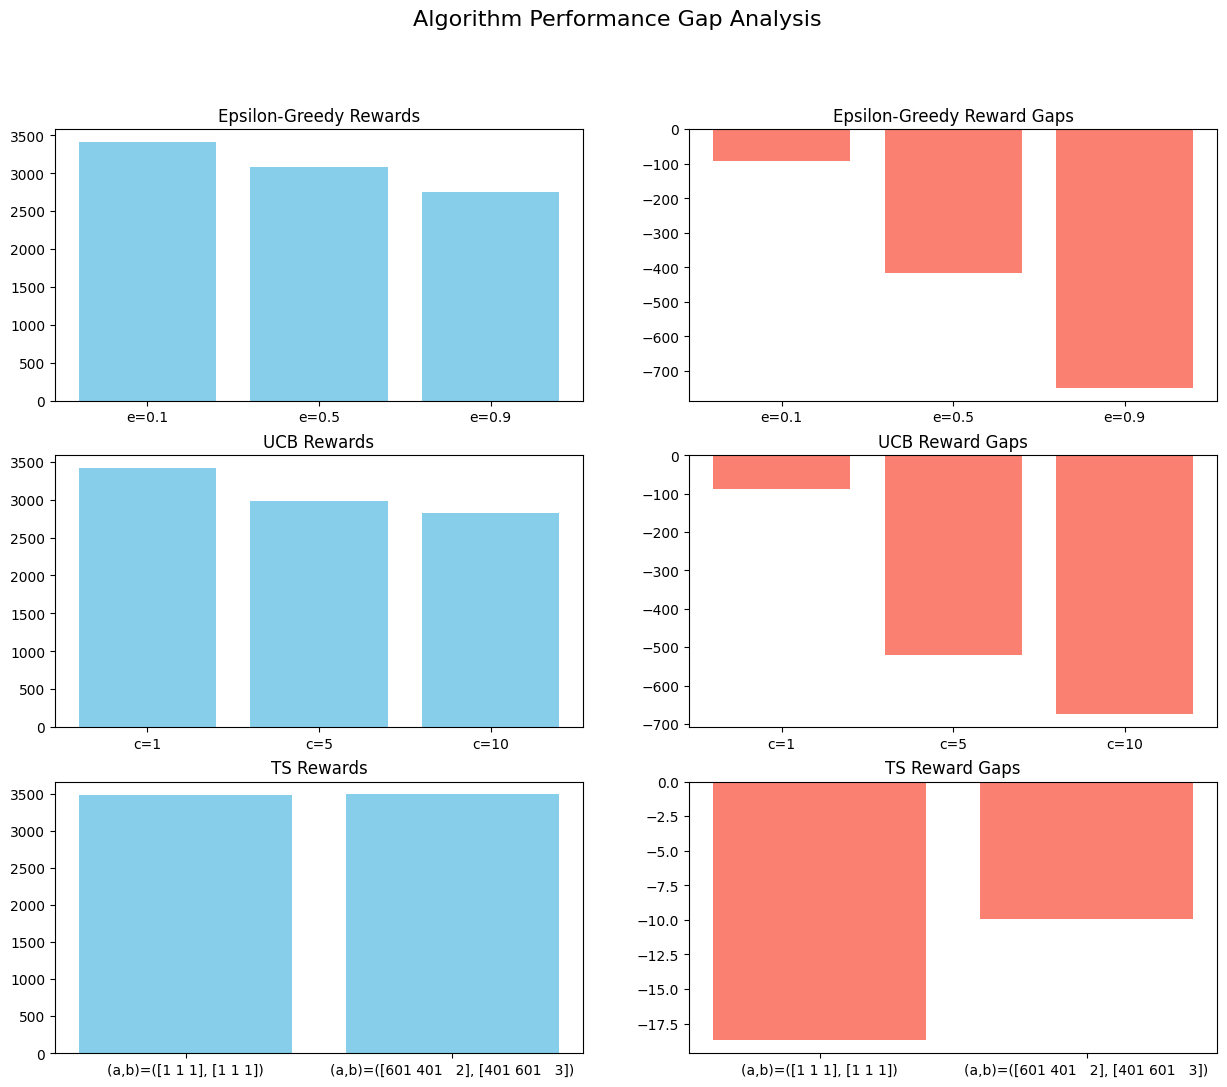

In [14]:
#oracle values
reward_oracle = n * max(theta_oracle)

# the settings
num_arm = 3  # number of arms
n = 5000  # number of trials in each simulation
epsilon = np.array([0.1, 0.5, 0.9])
c = np.array([1, 5, 10])
alpha = np.array([[1, 1, 1], [601, 401, 2]])
beta = np.array([[1, 1, 1], [401, 601, 3]])

#compute the gaps
epsilon_greedy_gaps_dict = {}
for i in range(len(epsilon)):
    epsilon_greedy_gaps_dict["e="+str(epsilon[i])] = rewards_average_eg[i] - reward_oracle
    
UCB_gaps_dict = {}
for i in range(len(c)):
    UCB_gaps_dict["c="+str(c[i])] = rewards_average_UCB[i] - reward_oracle
    
TS_gaps_dict = {}
for i in range(len(alpha)):
    TS_gaps_dict["(a,b)=("+str(alpha[i])+", "+str(beta[i])+")"] = rewards_average_TS[i] - reward_oracle
    
# Plotting
fig, ax = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle("Algorithm Performance Gap Analysis", fontsize=16)

# Epsilon-Greedy Plots
ax[0, 0].bar(list(epsilon_greedy_gaps_dict.keys()), rewards_average_eg, color='skyblue')
ax[0, 0].set_title("Epsilon-Greedy Rewards")
ax[0, 1].bar(list(epsilon_greedy_gaps_dict.keys()), list(epsilon_greedy_gaps_dict.values()), color='salmon')
ax[0, 1].set_title("Epsilon-Greedy Reward Gaps")

# UCB Plots
ax[1, 0].bar(list(UCB_gaps_dict.keys()), rewards_average_UCB, color='skyblue')
ax[1, 0].set_title("UCB Rewards")
ax[1, 1].bar(list(UCB_gaps_dict.keys()), list(UCB_gaps_dict.values()), color='salmon')
ax[1, 1].set_title("UCB Reward Gaps")

# TS Plots
ax[2, 0].bar(list(TS_gaps_dict.keys()), rewards_average_TS, color='skyblue')
ax[2, 0].set_title("TS Rewards")
ax[2, 1].bar(list(TS_gaps_dict.keys()), list(TS_gaps_dict.values()), color='salmon')
ax[2, 1].set_title("TS Reward Gaps")



As the bar charts depicted, the Thompson Sampling Algorithm (with $(a,b)=([601,401,2],[401,601,3])$) follows with the smallest gap and behaves best. Meanwhile, the other two behave worse with any parameters.

Discussion on the impacts of $\epsilon$, $c$, $\alpha_j$ and $\beta_j$ respectively.

1. the epsilon-greedy algorithm:  
   In the epsilon-greedy algorithm, the parameter $\epsilon$ resembles the degree we explore or exploit, and the probability we explore is $\epsilon$ while the probability we exploit is $1-\epsilon$. if $\epsilon$ were small, it means that we are more likely to explore other arms instead of the best arm, while if $\epsilon$ become large, then we are more likely to exploit our best arm.  
   From the results above, the reward reaches the highest with $\epsilon=0.1$, which is a small number and it indicated us that decrease the value may result in a high reward to some degree. And we can guess that the reward reaches the highest when $\epsilon$  follows a pattern resembling an exponential function, i.e., adjusting the values of $\epsilon$ during the experimental process, keeping it initially at a low level and subsequently increasing it. From my perspective, it's known that the exponential function will first decrease at a respectively lower speed and then decrease at a faster speed, which indicate that at the beginning we just prefer to choose the strategy of exploration and gradually after we have a preliminary estimation of which arm is relatively the best at the moment, we are expected to spend more time on the best arm.

1. the UCB algorithm:  
   In the UCB algorithm, the parameter c denotes the degree of exploration, and the higher the c is, the higher probability we get for exploration. From the calculation above, the rewaed reaches the highest with c=1, which is a small number and it indicated us that in a certain range, decrease the calue of c may contribute to a high reward.  
   Similar to the $\epsilon$-greedy algorithm, we also hypothesize that when the value of c varies throughout our experiments—adjusting c during the experimental process, initially maintaining it at a lower level and subsequently increasing it—there is a possibility of obtaining higher rewards in such scenarios, and we can understand this that at first, we are supposed to put more time on the exploration stage, and as time goes by, after we have a roughly estimate of whih one, we are more likely to choose the best arm we have learned, our idea is consistent with the growth of the exponential funcion, which is also decrease slowly at fist then decrease sharply later.

1. the Thompson Sampling algorithm:  
   In the Thompson Sampling algorithm, we have two parameter $\alpha$ and $\beta$ related to $\hat{\theta_j}$, which denote the prior belief of the distribution of the reward then we update the parameters according to the reward we get.  
   And we can learn that if $\alpha_j$ and $\beta_j$ were small initially, we are more likely to have less exploration since the given information is insufficient, and if $\alpha_j$ and $\beta_j$ were big, then we are more likely to explore instead of exploit, and we can find the process is like a kind of bayes experiment, where we make our next step based on the privious information we get, which means that the value of $\alpha_j$ and $\beta_j$ contribute to the later performance.

---

> ### Problem 5
>
> Give your understanding of the exploration-exploitation trade-off in bandit algorithms.

### Answer of Problem 5

The challenge lies in finding a balance between exploring and exploiting. Exploration means collecting more data from past decisions and feedback, while exploitation means using that information for the best outcomes.

The difficulty arises from not knowing when to transition from exploring to exploiting. Constantly exploring may mean missing better rewards, while constant exploiting may lead to wrong choices. A simple approach, like exploring when uncertain and exploiting when confident, isn't clear enough. We're unsure about the frequency of exploration and the transition to exploitation.  
From our experiments, we've observed a relationship between rewards and regrets in these algorithms. As rewards increase, regrets decrease, and vice versa.

Epsilon-Greedy Approach
This method involves a parameter controlling exploration levels. We set probabilities for exploration and exploitation at each step. Experimentation reveals that initiating with more exploration and gradually shifting to more exploitation leads to better results. Adjusting this parameter over time, with a decrease, delivers optimal performance.

UCB Approach
This method uses certain boundaries and time-based factors to manage exploration and exploitation. It utilizes a parameter to balance these actions. It guides arm selection, focusing on both exploitation and exploration. As the number of turns increases, the emphasis on exploration decreases. Experiments highlight that a smaller value results in better performance. Adjusting the parameter based on turn count, favoring more exploration initially and more exploitation later, enhances overall performance.

Thompson Sampling Approach
Similar to Bayesian Inference, this method utilizes specific distributions to control exploration and exploitation. It maintains a distribution for each arm and updates it based on feedback. More data improves performance, establishing a good balance between exploration and exploitation. Among these methods, Thompson Sampling consistently performs better, even with minor parameter changes.

In Conclusion, each method has unique strengths in balancing exploration and exploitation. Choosing the right one depends on the situation. Adjusting parameters is crucial for optimal results. Striking the right balance between exploration and exploitation is crucial in bandit algorithms.

> ### Problem 6
>
> We implicitly assume the reward distribution of these three arms are independent. How about the dependent case? Can you design an algorithm to exploit such information to obtain a better result?

### Answer of Problem 6

This is a complex problem and the point is how the arms are related. The concept behind our algorithm is the assumption that the first two arms are not independent regarding reward distribution, while the third arm's reward distribution is independent of the first two. Specifically, we posit that the success of arm 1(2) is equal to the same of arm 2(1).

Our approach suppose that arms one and two share an identical Beta distribution, while arm three operates on a distinct Beta distribution. Regardless of whether arms one or two succeed or fail upon selection, their distributions are updated in tandem. Choosing arm one entails updating the Beta distributions of both arms one and two, similarly for the selection of arm two. In contrast, selecting arm three leads to an exclusive update of its own Beta distribution, ensuring that arms one and two maintain synchronized distributions. This method can enhances the convergence speed by maximizing the information gleaned from arms one and two. It also streamlines the decision-making process, guiding the algorithm to more optimal choices.

Should arms one and two be determined as the less favorable options, the algorithm is designed to pivot towards arm three more rapidly. Conversely, if arms one and two prove to be more advantageous, the algorithm will gravitate towards them with increased speed. Ultimately, this strategy promotes a more efficient exploration mode, optimizing the trade-off between exploration and exploitation, thereby increasing the likelihood of securing superior rewards.

Let's start with the $\epsilon$-greedy algorithm:


epsilon =  0.1 , reward =  3476
epsilon =  0.5 , reward =  3103
epsilon =  0.9 , reward =  2764


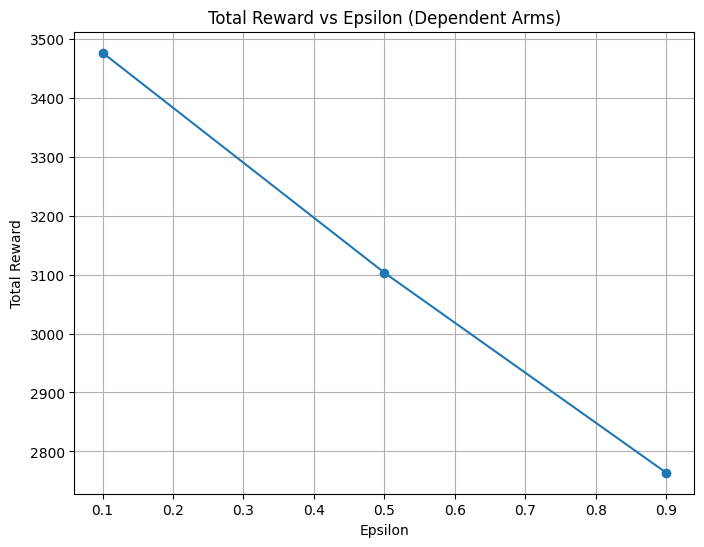

In [15]:
#the epsilon-greedy algorithm with dependent arms
def epsilon_greedy_dependent(num_arm, n, epsilon):
    #initialize the variables
    count = np.zeros(num_arm)
    theta_hat = np.zeros(num_arm)
    reward = 0
    
    for _ in range(n):
        if np.random.random() < epsilon:   #the exploration 
            arm = np.random.randint(num_arm)
        else:   #the exploitation
            arm = np.argmax(theta_hat)
        #update the variables
        r = np.random.binomial(1, theta_oracle[arm])   #the reward in this trial
        if (arm != 2):
            count[0] += 1
            count[1] += 1
            theta_hat[0] += (1/count[0]) * (r - theta_hat[0])
            theta_hat[1] += (1/count[1]) * (r - theta_hat[1]) 
        else:
            count[2] += 1
            theta_hat[2] += (1/count[2]) * (r - theta_hat[2])
        reward += r
        
    return reward

# Re-initialize the epsilon values as a numpy array
epsilon_values = np.array([0.1, 0.5, 0.9])  # Assuming these are the epsilon values you want to use

rewards_dependent_eg = np.zeros(len(epsilon_values))
for i in range(len(epsilon_values)):
    rewards_dependent_eg[i] = epsilon_greedy_dependent(num_arm, n, epsilon_values[i])
    print("epsilon = ", epsilon_values[i], ", reward = ", int(rewards_dependent_eg[i]))

# Plotting the rewards for different epsilon values
plt.figure(figsize=(8, 6))
plt.plot(epsilon_values, rewards_dependent_eg, marker='o')
plt.title('Total Reward vs Epsilon (Dependent Arms)')
plt.xlabel('Epsilon')
plt.ylabel('Total Reward')
plt.grid(True)
plt.show()


The UCB algorithm with dependent arms is as follows:

c =  1 , reward =  3479
c =  5 , reward =  3197
c =  10 , reward =  2971


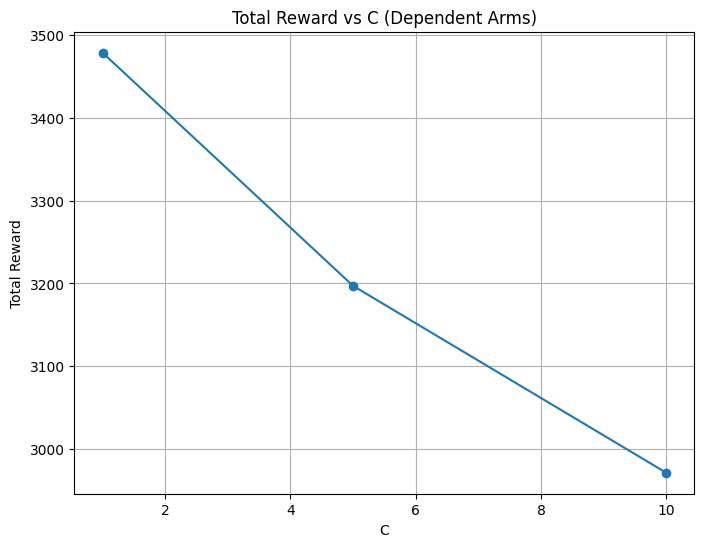

In [16]:
#the UCB (Upper Confidence Bound) algorithm with dependent arms
def UCB_dependent(num_arm, n, c):
    #initialize the variables
    count = np.zeros(num_arm)
    theta_hat = np.zeros(num_arm)
    reward = 0
    
    #the exploration
    for t in range(num_arm):
        arm = t
        count[arm] += 1
        r = np.random.binomial(1, theta_oracle[arm])   #the reward in this trial
        #update the variables
        theta_hat[arm] = r
        reward += r

    #the exploitation
    for t in range(num_arm + 1, n + 1):
        arm = np.argmax(theta_hat + c * np.sqrt(2*np.log(t)/count))
        #update the variables
        r = np.random.binomial(1, theta_oracle[arm])   #the reward in this trial 
        if (arm != 2):
            count[0] += 1
            count[1] += 1
            theta_hat[0] += (1/count[0]) * (r - theta_hat[0])
            theta_hat[1] += (1/count[1]) * (r - theta_hat[1])
        else:
            count[2] += 1
            theta_hat[2] += (1/count[2]) * (r - theta_hat[2])
        reward += r
        
    return reward

c_values = np.array([1, 5, 10])  # Assuming these are the c values you want to use

rewards_dependent_UCB = np.zeros(len(c_values))
for i in range(len(c_values)):
    rewards_dependent_UCB[i] = UCB_dependent(num_arm, n, c_values[i])
    print("c = ", c_values[i], ", reward = ", int(rewards_dependent_UCB[i]))

# Plotting the rewards for different c values
plt.figure(figsize=(8, 6))
plt.plot(c_values, rewards_dependent_UCB, marker='o')
plt.title('Total Reward vs C (Dependent Arms)')
plt.xlabel('C')
plt.ylabel('Total Reward')
plt.grid(True)
plt.show()

The TS algorithm arms is as follows:

In [17]:
#the TS (Thompson sampling) algorithm with dependent arms
def TS_dependent(num_arm, n, alpha, beta):
    #copy the alpha and beta    
    alpha_post = np.zeros(num_arm)
    beta_post = np.zeros(num_arm)
    for arm in range(num_arm):
        alpha_post[arm] = alpha[arm]
        beta_post[arm] = beta[arm]
    
    #initialize the variables
    theta_hat = np.zeros(num_arm)
    reward = 0
    
    for _ in range(n):
        for arm in range(num_arm):
            theta_hat[arm] = np.random.beta(alpha_post[arm], beta_post[arm])
        arm = np.argmax(theta_hat)
        #update the variables
        r = np.random.binomial(1, theta_oracle[arm])   #the reward in this trial
        if (arm != 2):
            alpha_post[0] += r
            beta_post[0] += 1 - r
            alpha_post[1] += r
            beta_post[1] += 1 - r
        else:
            alpha_post[2] += r
            beta_post[2] += 1 - r
        reward += r
        
    return reward

rewards_dependent_TS = np.zeros(len(alpha))
for i in range(len(alpha)):
    rewards_dependent_TS[i] = TS_dependent(num_arm, n, alpha[i], beta[i])
    print("alpha = ", alpha[i], ", beta = ", beta[i])
    print("reward = ", format(rewards_dependent_TS[i], '.3f'))
    print()

alpha =  [1 1 1] , beta =  [1 1 1]
reward =  2991.000

alpha =  [601 401   2] , beta =  [401 601   3]
reward =  3479.000



<style>
.center 
{
  width: auto;
  display: table;
  margin-left: auto;
  margin-right: auto;
}
</style>

---

## Part 2: Bayesian Bandit Algorithms

There are two arms which may be pulled repeatedly in any order.
Each pull may result in either a success or a failure.
The sequence of successes and failures which results from pulling arm $i$ ($i \in \{1, 2\}$) forms a Bernoulli process with unknown success probability $\theta_{i}$.
A success at the $t^{th}$ pull yields a reward $\gamma^{t-1}$ ($0 < \gamma <1$), while an unsuccessful pull yields a zero reward.
At time zero, each $\theta_{i}$ has a Beta prior distribution with two parameters $\alpha_{i}, \beta_{i}$ and these distributions are independent for different arms.
These prior distributions are updated to posterior distributions as arms are pulled.
Since the class of Beta distributions is closed under Bernoulli sampling, posterior distributions are all Beta distributions.
How should the arm to pull next in each time slot be chosen to maximize the total expected reward from an infinite sequence of pulls?

> ### Problem 1
>
> One intuitive policy suggests that in each time slot we should pull the arm for which the current expected value of $\theta_{i}$ is the largest.
> This policy behaves very good in most cases. Please design simulations to check the behavior of this policy.

### Answer of Problem 1

Simulation setting:

The oracled value is 0.7 and 0.5 respectively.

The $\gamma$ (discount factor) take on three different value.

- $\gamma$ = 0.1:
  With a low discount factor, future rewards are heavily discounted, emphasizing immediate gains. This scenario is less sensitive to the initial bias as the policy quickly adapts based on immediate outcomes.

- $\gamma$ = 0.5:
  There's a balance between the present and future rewards. The impact of initial bias is more pronounced as the rewards accumulate over time, but not as heavily discounted as in γ = 0.3.

- $\gamma$ = 0.9:
  A high discount factor values future rewards more similarly to immediate ones. This results in a greater impact of initial bias since the policy has more time to exploit the arm believed to be superior.

There are three settings for the parameters of the prior Beta distribution, reflecting our diffrent belief.

- Setting 1:

  We prefer first arm
  $\theta_1\sim Beta(2,1)$, $\theta_2\sim Beta(1,1)$

- Setting 2:

  No specific preference
  $\theta_1\sim Beta(1,1)$, $\theta_2\sim Beta(1,1)$

- Setting 3:

  We prefer second arm
  $\theta_1\sim Beta(1,1)$, $\theta_2\sim Beta(2,1)$

We can also set the line factor $\gamma$ into different values.


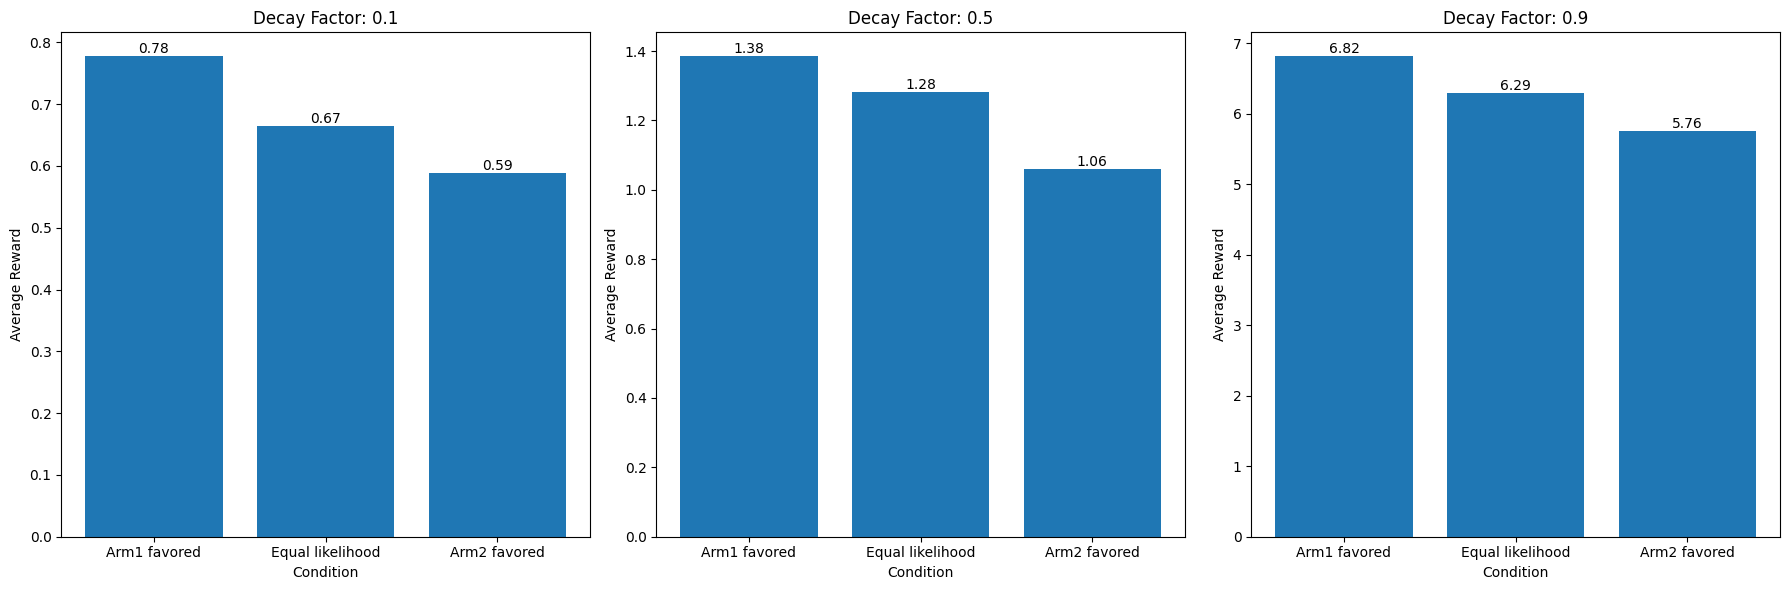

In [18]:
# True success probabilities for each arm, given as per the earlier context
oracled_value = [0, 0.7, 0.5]
decay_factors = [0.1, 0.5, 0.9]

# Simulation function
def simulate_bandit_strategy(
    discount, number_of_pulls, alpha_params, beta_params, true_probs
):
    total_reward = 0
    discount_multiplier = 1

    for pull in range(1, number_of_pulls + 1):
        exp_rate_arm1 = alpha_params[1] / (alpha_params[1] + beta_params[1])
        exp_rate_arm2 = alpha_params[2] / (alpha_params[2] + beta_params[2])

        if exp_rate_arm1 == exp_rate_arm2:
            chosen_arm = np.random.choice([1, 2])
        else:
            chosen_arm = 1 if exp_rate_arm1 > exp_rate_arm2 else 2

        outcome = np.random.rand() < true_probs[chosen_arm]

        if outcome:
            alpha_params[chosen_arm] += 1
            total_reward += discount_multiplier
        else:
            beta_params[chosen_arm] += 1

        discount_multiplier *= discount

    return total_reward


# Initialize the simulation parameters
num_simulations = 1000
num_pulls = 1000
rewards_by_scenario = np.zeros(9)
scenario_index = 0

# Store results for plotting
results = []

# Modified initial conditions
for initial_condition in range(3):
    for decay_factor in decay_factors:
        # Adjust the initial alpha and beta values for each scenario

        # Arm1 favored
        if initial_condition == 0:
            alphas = [0, 2, 1]

        # Equal likelihood
        elif initial_condition == 1:
            alphas = [0, 1, 1]

        # Arm2 favored
        else:
            alphas = [0, 1, 2]
        betas = [0, 1, 1]

        total_reward = 0
        for _ in range(num_simulations):
            total_reward += simulate_bandit_strategy(
                decay_factor,
                num_pulls,
                alphas.copy(),
                betas.copy(),
                oracled_value,
            )

        average_reward = total_reward / num_simulations
        results.append(
            {
                "condition": ["Arm1 favored", "Equal likelihood", "Arm2 favored"][
                    initial_condition
                ],
                "decay_factor": decay_factor,
                "average_reward": average_reward,
            }
        )
        scenario_index += 1

# Creating a subplot for each decay factor
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

for i, decay_factor in enumerate(decay_factors):
    condition_data = [d for d in results if d["decay_factor"] == decay_factor]
    conditions = [d["condition"] for d in condition_data]
    rewards = [d["average_reward"] for d in condition_data]

    ax = plt.subplot(1, 3, i + 1)
    bars = ax.bar(conditions, rewards)
    plt.title(f"Decay Factor: {decay_factor}")
    plt.xlabel("Condition")
    plt.ylabel("Average Reward")

    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            round(yval, 2),
            va="bottom",
            ha="center",
        )

plt.tight_layout()
plt.show()

#### Conclusion

The simulation explores the impact of initial biases and discount factors on the performance of a two-armed bandit problem. We can find that the higher cumulative rewards are observed when the discount factor $\gamma$ is set to 0.9, highlighting the increased value of future rewards and it should be noted that the difference between different favor of the first is gradually become larger as the γ gose larger. This effect underscores the importance of initial beliefs in the long-term outcomes of the policy.


> ### Problem 2
>
> However, such intuitive policy is unfortunately not optimal. Please provide an example to show why such policy is not optimal.

### Answer of Problem 2

#### Perspective 1:

An intuitive policy, such as always choosing the arm with the current highest expected value, can fall into the trap of early commitment to an arm that seems superior initially but is not the best option in the long run. This is because such a policy heavily relies on exploiting the best-known option without sufficiently exploring the others, which may lead to suboptimal outcomes. We may Consider a two-armed bandit problem with the following true success probabilities:

- Arm 1:
  With true success probability of 0.9, unknown to the player, initially believed to be lower (e.g., $Beta(1,1)$).
- Arm 2:
  True success probability of 0.8, unknown to the player, initially believed to be higher (e.g., $Beta(2,1)$).

An intuitive policy would initially prefer Arm 2 due to the higher expected value from the prior. If Arm 2 happens to yield a success in the first few pulls, it will reinforce the belief that it's the better arm, even though Arm 1 has a higher true success probability.
If the intuitive policy continues to favor Arm 2, it may not pull Arm 1 enough times to discover that it actually has a higher success probability. As a result, the player may miss out on the higher rewards that could have been obtained from Arm 1. This lack of exploration results in a suboptimal long-term reward.

#### Perspective 2:

The intuitive policy's limitation lies in its propensity for early commitment. When faced with two choices whose success probabilities are closely matched, the policy lacks the mechanism to adequately explore and exploit the arms to discern the slightly better option. Specifically, our simulation aimed to evaluate the performance of an intuitive selection policy under closely matched arm probabilities within a bandit problem framework. The true success probabilities for the arms were set at 0.8 and 0.7, respectively, with a discount factor ($\gamma$) of 0.9 .

We conducted 1000 iterations where each iteration involved:

- Estimating the expected reward for sticking with each arm based on its success probability and the discount factor.
- Randomly choosing an arm based on its true probability and comparing the actual reward to the estimated rewards.


In [19]:
oracle_value = [0, 0.7, 0.5]
num_pulls = 1000


def close_prob_sim(p1, p2, gamma, N=1000):
    # the res[0] is the number of the cases that our algorithm gets greater reward.
    res = [0, 0]
    alpha_params = [0, 1, 1]  # Alpha parameters for the arms
    beta_params = [0, 1, 1]  # Beta parameters for the arms

    for i in range(N):
        reward = simulate_bandit_strategy(
            gamma,
            num_pulls,
            alpha_params.copy(),
            beta_params.copy(),
            oracle_value,
        )

        # Calculate the expected rewards based on given probabilities and discount factor
        est_p1 = p1 / (1 - gamma)  # est_p1(arm1) is the better reward
        est_p2 = p2 / (1 - gamma)  # est_p2(arm2) is the worse reward

        # Compare the actual reward with the expected rewards
        if abs(reward - est_p1) < abs(reward - est_p2):
            res[0] += 1
        elif abs(reward - est_p1) > abs(reward - est_p2):
            res[1] += 1

    return res


# Running the simulation
est_res = close_prob_sim(0.8, 0.7, 0.9, 1000)
print("The number of cases that the final case converge to ideal case: ", est_res[0])
print(
    "The number of cases that the final case converge to non-ideal case: ", est_res[1]
)

The number of cases that the final case converge to ideal case:  178
The number of cases that the final case converge to non-ideal case:  822


> ### Problem 3
>
> For the expected total reward under an optimal policy, show that the following recurrence equation holds:

\begin{equation*}
\begin{aligned}
R*{1}(\alpha*{1},\beta*{1})
= & \frac{\alpha*{1}}{\alpha*{1}+\beta*{1}} [1+\gamma R(\alpha_{1} + 1, \beta_{1}, \alpha_{2}, \beta_{2})] \\
& + \frac{\beta*{1}}{\alpha*{1} + \beta*{1}} [\gamma R(\alpha*{1}, \beta*{1} + 1, \alpha*{2}, \beta*{2})]; \\
R*{2}(\alpha*{2}, \beta*{2})
= & \frac{\alpha*{2}}{\alpha*{2} + \beta*{2}} [1 + \gamma R(\alpha*{1}, \beta*{1}, \alpha*{2} + 1, \beta*{2})] \\
& + \frac{\beta*{2}}{\alpha*{2} + \beta*{2}} [\gamma R(\alpha_{1}, \beta_{1}, \alpha_{2}, \beta_{2} + 1)]; \\
R(\alpha*{1}, \beta*{1}, \alpha*{2}, \beta*{2})
= & \max \left\{ R*{1}(\alpha*{1}, \beta*{1}), R*{2}(\alpha*{2}, \beta*{2}) \right\}.
\end{aligned}
\end{equation*}

### Answer of Problem 3

We will prove the recurrence relation for $R_1(\alpha_1, \beta_1)$, and the proof for $R_2(\alpha_2, \beta_2)$ follows similarly.

When we decide to pull arm 1, two outcomes are possible: success or failure. The probability of success is given by the expected value of $\theta_1$ which is $\frac{\alpha_1}{\alpha_1 + \beta_1}$, because $\theta_1 \sim \text{Beta}(\alpha_1, \beta_1)$.

1. **Success Case:**

   - We receive an immediate reward of 1.
   - The parameters of the Beta distribution for arm 1 are updated to $\alpha_1 + 1$ and $\beta_1$ as we have Beta-Binoimal conjugate, reflecting our updated belief after observing a success.
   - The discounted future reward is $\gamma R(\alpha_1 + 1, \beta_1, \alpha_2, \beta_2)$.

2. **Failure Case:**
   - We receive no immediate reward.
   - The parameters of the Beta distribution for arm 1 are updated to $\alpha_1$ and $\beta_1 + 1$ as we have Beta-Binoimal conjugate, reflecting our updated belief after observing a failure.
   - The discounted future reward is $\gamma R(\alpha_1, \beta_1 + 1, \alpha_2, \beta_2)$.

The total expected reward for pulling arm 1 is thus the sum of the expected rewards for each case, weighted by their probabilities:

$$
R_1(\alpha_1, \beta_1) = \frac{\alpha_1}{\alpha_1 + \beta_1} [1 + \gamma R(\alpha_1 + 1, \beta_1, \alpha_2, \beta_2)] + \frac{\beta_1}{\alpha_1 + \beta_1} \gamma R(\alpha_1, \beta_1 + 1, \alpha_2, \beta_2).
$$

Similarly, we can derive $R_2(\alpha_2, \beta_2)$ for arm 2.

Finally, since at each step we want to choose the action that maximizes our expected reward, the total expected reward $R(\alpha_1, \beta_1, \alpha_2, \beta_2)$ is the maximum of $R_1(\alpha_1, \beta_1)$ and $R_2(\alpha_2, \beta_2)$.

$$
R(\alpha_1, \beta_1, \alpha_2, \beta_2) = \max\{R_1(\alpha_1, \beta_1), R_2(\alpha_2, \beta_2)\}.
$$

Thus, we can get that,

$$R_1(\alpha_1,\beta_1)=\dfrac{\alpha_1}{\alpha_1+\beta_1}[1+\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)]+\dfrac{\beta_1}{\alpha_1+\beta_1}[\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)]$$
$$R_2(\alpha_2,\beta_2)=\dfrac{\alpha_2}{\alpha_2+\beta_2}[1+\gamma R(\alpha_1,\beta_1,\alpha_2+1,\beta_2)]+\dfrac{\beta_2}{\alpha_2+\beta_2}[\gamma R(\alpha_2,\beta_1,\alpha_2,\beta_2+1)]$$
$$R(\alpha_1,\beta_1,\alpha_2,\beta_2)=\max\{R_1(\alpha_1,\beta_1),R_2(\alpha_2,\beta_2)\}$$

> ### Problem 4
>
> For the above equations, how to solve it exactly or approximately?

### Answer of Problem 4

There is no bound for this recurrence, so we can not solve it exactly. Instead, we may derive an approximate solution.


In [20]:
def calculate_reward(
    alpha1, beta1, alpha2, beta2, gamma, memo, counter=0, max_pulls=50
):
    # Check if the result is already in the memo dictionary to avoid recalculating.
    if (alpha1, beta1, alpha2, beta2) in memo:
        return memo[(alpha1, beta1, alpha2, beta2)]

    # Base case: if counter exceeds max_pulls, calculate and return the mean values.
    if counter > max_pulls:
        mean1 = alpha1 / (alpha1 + beta1)
        mean2 = alpha2 / (alpha2 + beta2)
        return max(mean1, mean2)

    # Calculate the expected reward for each arm.
    reward1 = (alpha1 / (alpha1 + beta1)) * (
        1
        + gamma
        * calculate_reward(
            alpha1 + 1, beta1, alpha2, beta2, gamma, memo, counter + 1, max_pulls
        )
    ) + (beta1 / (alpha1 + beta1)) * (
        gamma
        * calculate_reward(
            alpha1, beta1 + 1, alpha2, beta2, gamma, memo, counter + 1, max_pulls
        )
    )
    reward2 = (alpha2 / (alpha2 + beta2)) * (
        1
        + gamma
        * calculate_reward(
            alpha1, beta1, alpha2 + 1, beta2, gamma, memo, counter + 1, max_pulls
        )
    ) + (beta2 / (alpha2 + beta2)) * (
        gamma
        * calculate_reward(
            alpha1, beta1, alpha2, beta2 + 1, gamma, memo, counter + 1, max_pulls
        )
    )

    reward = max(reward1, reward2)

    # Store the maximum reward makes things faster
    memo[(alpha1, beta1, alpha2, beta2)] = reward
    return reward

> ### Problem 5
>
> Find the optimal policy.

### Answer of Problem 5

As the states can be really large, we decide to caculate 100 pulls as the upper bound.

For the algorithm,

- If we haven't reached 100 pulls yet, we make a guess for each arm. We think about what could happen if we get a reward right now (which is great) and what the future might bring
- After guessing the outcomes for both arms, we choose the arm with the better outcome and remember this in our memory bank.
- The function is called for different $\gamma$ values and starting beliefs.

We conduct the simulation with the same setting as in Problem 1

Using the simluation, we may derive a optimal policy


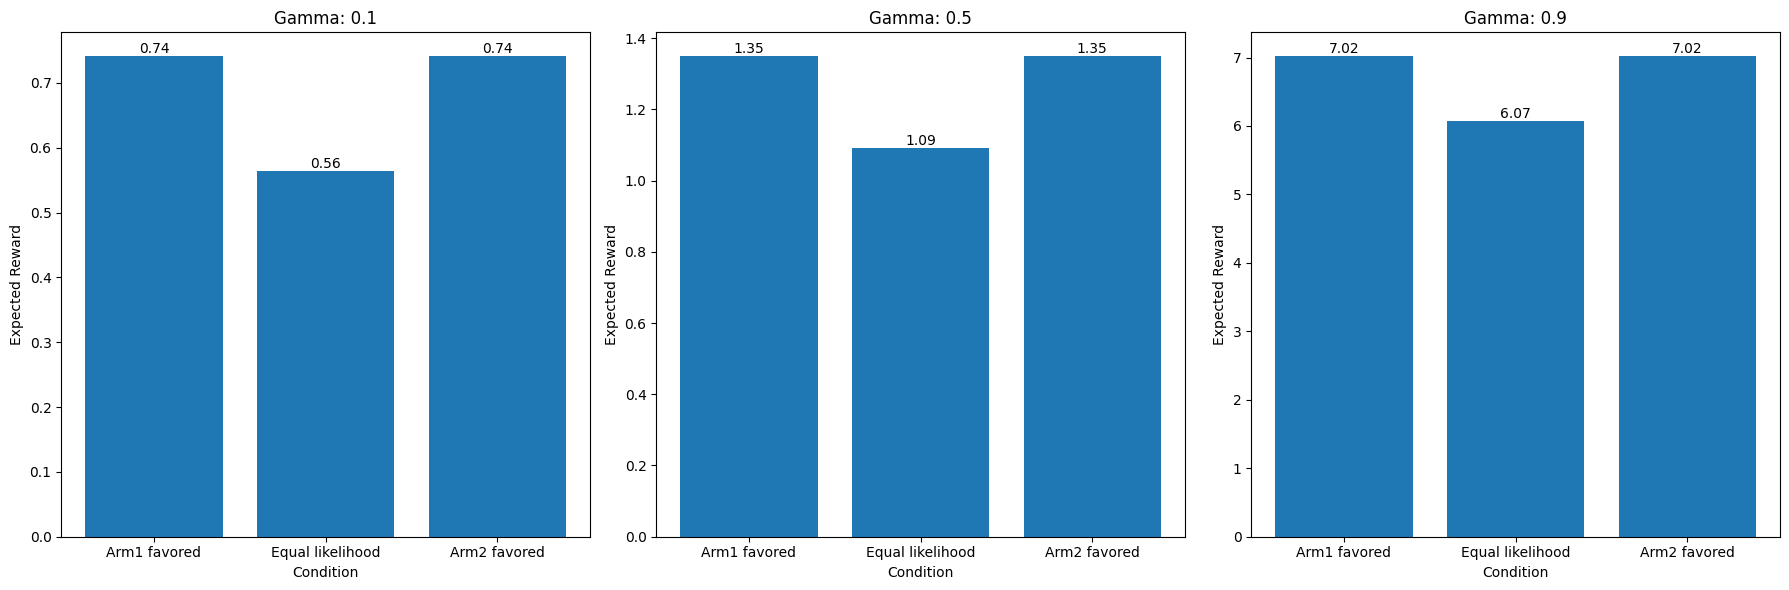

In [21]:
import numpy as np
import matplotlib.pyplot as plt


# Define the calculate_reward function as before
def calculate_reward(
    alpha1, beta1, alpha2, beta2, gamma, memo, counter=0, max_pulls=50
):
    # Key for memoization
    key = (alpha1, beta1, alpha2, beta2, counter)

    # Check if the result is already in the memo dictionary to avoid recalculating.
    if key in memo:
        return memo[key]

    # Base case: if counter exceeds max_pulls, calculate and return the mean values.
    if counter > max_pulls:
        mean1 = alpha1 / (alpha1 + beta1)
        mean2 = alpha2 / (alpha2 + beta2)
        return max(mean1, mean2)

    # Calculate the expected reward for each arm.
    reward1 = (alpha1 / (alpha1 + beta1)) * (
        1
        + gamma
        * calculate_reward(
            alpha1 + 1, beta1, alpha2, beta2, gamma, memo, counter + 1, max_pulls
        )
    ) + (beta1 / (alpha1 + beta1)) * (
        gamma
        * calculate_reward(
            alpha1, beta1 + 1, alpha2, beta2, gamma, memo, counter + 1, max_pulls
        )
    )
    reward2 = (alpha2 / (alpha2 + beta2)) * (
        1
        + gamma
        * calculate_reward(
            alpha1, beta1, alpha2 + 1, beta2, gamma, memo, counter + 1, max_pulls
        )
    ) + (beta2 / (alpha2 + beta2)) * (
        gamma
        * calculate_reward(
            alpha1, beta1, alpha2, beta2 + 1, gamma, memo, counter + 1, max_pulls
        )
    )

    # Store the maximum reward in the memo dictionary before returning it.
    reward = max(reward1, reward2)
    memo[key] = reward
    return reward


gamma_values = [0.1, 0.5, 0.9]
initial_conditions = [
    ("Arm1 favored", (2, 1), (1, 1)),
    ("Equal likelihood", (1, 1), (1, 1)),
    ("Arm2 favored", (1, 1), (2, 1)),
]
results = []

for gamma in gamma_values:
    for condition, (alpha1, beta1), (alpha2, beta2) in initial_conditions:
        memoization_dict = {}
        reward = calculate_reward(alpha1, beta1, alpha2, beta2, gamma, memoization_dict)
        results.append(
            {"gamma": gamma, "condition": condition, "expected_reward": reward}
        )

plt.figure(figsize=(18, 6))

for i, gamma in enumerate(gamma_values):
    gamma_data = [d for d in results if d["gamma"] == gamma]
    conditions = [d["condition"] for d in gamma_data]
    rewards = [d["expected_reward"] for d in gamma_data]

    ax = plt.subplot(1, 3, i + 1)
    bars = ax.bar(conditions, rewards)
    plt.title(f"Gamma: {gamma}")
    plt.xlabel("Condition")
    plt.ylabel("Expected Reward")

    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            round(yval, 2),
            va="bottom",
            ha="center",
        )

plt.tight_layout()
plt.show()